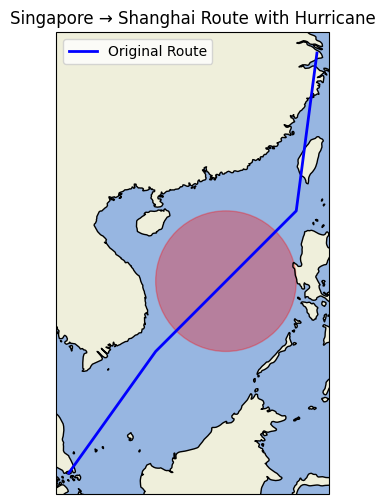

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import LineString, Point
import cartopy.feature as cfeature

# Example route (Singapore to Shanghai)
route = [(103.8198, 1.3521), (110, 10), (120, 20), (121.4737, 31.2304)]
hurricane_center = (115, 15)
hurricane_radius = 5  # degrees, simple circle

# Plot
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

# Original route
x, y = zip(*route)
ax.plot(x, y, color='blue', linewidth=2, label='Original Route')

# Hurricane area
circle = plt.Circle(hurricane_center, hurricane_radius, color='red', alpha=0.3)
ax.add_patch(circle)

plt.legend()
plt.title("Singapore → Shanghai Route with Hurricane")
plt.savefig("map_before.png", dpi=300)

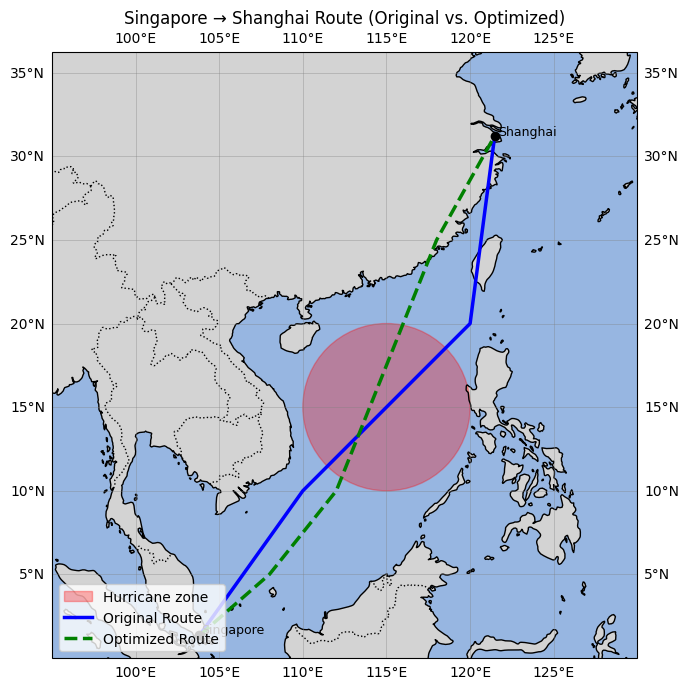

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- Base setup ---
fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([95, 130, 0, 35])  # zoom to SEA–China region

# Add basic map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

# --- Data ---
# Original route: Singapore → Shanghai
route_original = [
    (103.8198, 1.3521),   # Singapore
    (110, 10),
    (120, 20),
    (121.4737, 31.2304)   # Shanghai
]

# Optimized route (manually adjusted north to avoid storm region)
route_optimized = [
    (103.8198, 1.3521),   # Singapore
    (108, 5),
    (112, 10),
    (118, 25),
    (121.4737, 31.2304)   # Shanghai
]

# Hurricane area (red circle)
hurricane_center = (115, 15)
hurricane_radius = 5  # degrees (rough approximation)
circle = plt.Circle(hurricane_center, hurricane_radius, color='red', alpha=0.3,
                    transform=ccrs.PlateCarree(), label='Hurricane zone')
ax.add_patch(circle)

# --- Plot routes ---
x1, y1 = zip(*route_original)
ax.plot(x1, y1, color='blue', linewidth=2.5, label='Original Route')

x2, y2 = zip(*route_optimized)
ax.plot(x2, y2, color='green', linewidth=2.5, linestyle='--', label='Optimized Route')

# Mark start and end
ax.plot(route_original[0][0], route_original[0][1], 'o', color='black', markersize=6)
ax.text(103.9, 1.5, 'Singapore', fontsize=9)
ax.plot(route_original[-1][0], route_original[-1][1], 'o', color='black', markersize=6)
ax.text(121.7, 31.3, 'Shanghai', fontsize=9)

# --- Finish ---
plt.title("Singapore → Shanghai Route (Original vs. Optimized)")
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig("route_comparison.png", dpi=300)
plt.show()

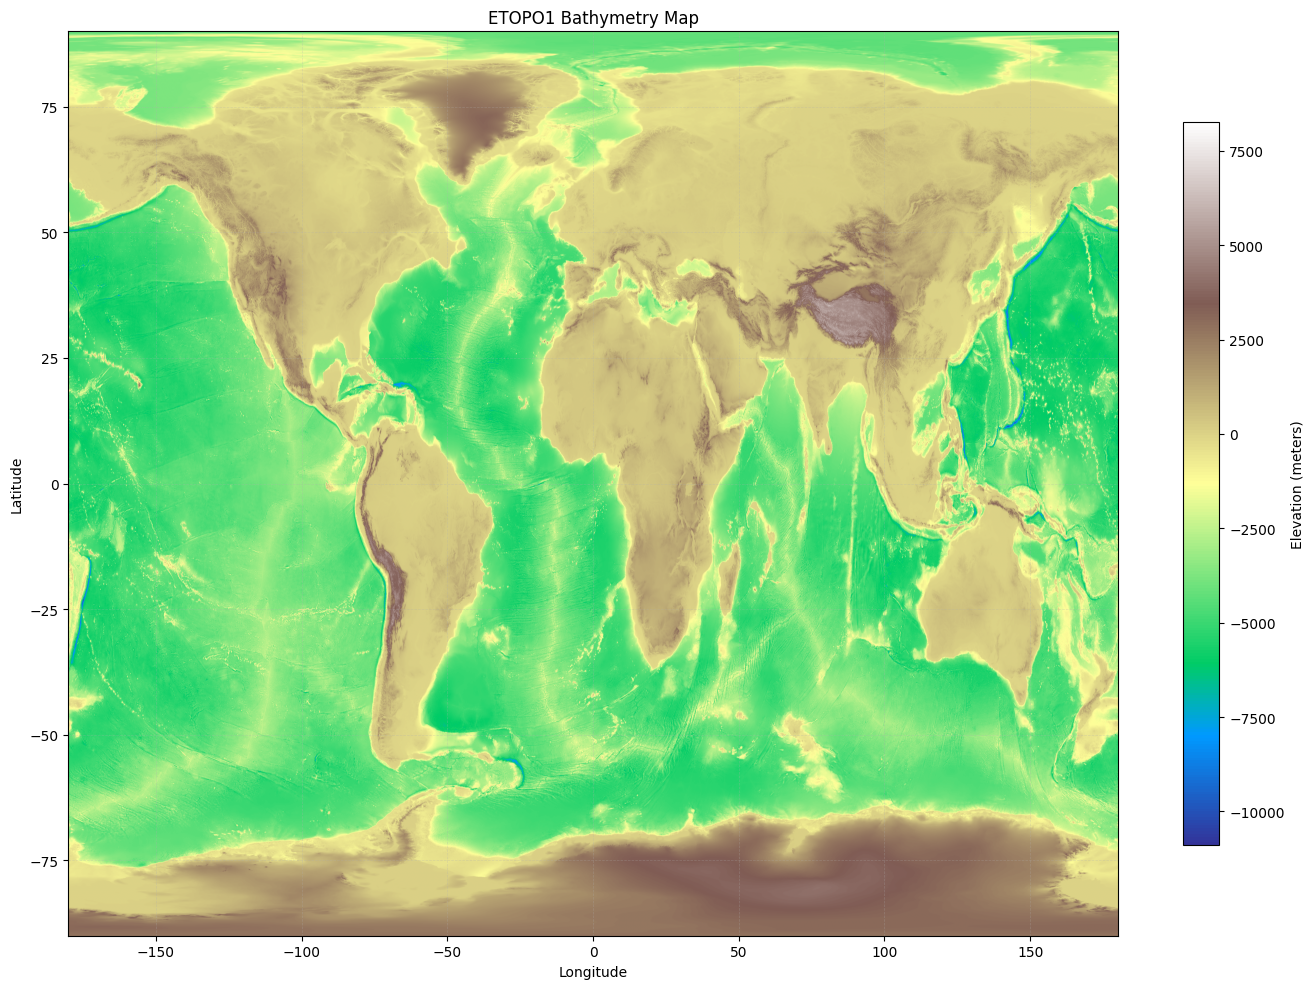

Bathymetry bounds: BoundingBox(left=-180.00833333333333, bottom=-90.00833333333328, right=180.00833333333333, top=90.00833333333334)
Resolution: (0.016666666666666666, 0.016666666666666663)
CRS: None
Elevation range: -10898.0m to 8271.0m


In [9]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np

# --- Load bathymetry data ---
bathy = rasterio.open("ETOPO1_Ice_g_geotiff.tif")

# --- Create figure ---
fig, ax = plt.subplots(figsize=(14, 10))

# --- Display bathymetry ---
# Read the data
elevation = bathy.read(1)

# Create extent for proper geographic display
extent = [bathy.bounds.left, bathy.bounds.right, bathy.bounds.bottom, bathy.bounds.top]

# Plot with a suitable colormap for bathymetry
# 'terrain' shows land/water nicely, 'ocean' focuses on water depth
im = ax.imshow(elevation, cmap='terrain', extent=extent, aspect='auto')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, label='Elevation (meters)', shrink=0.8)

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('ETOPO1 Bathymetry Map')

# Add gridlines
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Print some info about the dataset
print(f"Bathymetry bounds: {bathy.bounds}")
print(f"Resolution: {bathy.res}")
print(f"CRS: {bathy.crs}")
print(f"Elevation range: {elevation.min():.1f}m to {elevation.max():.1f}m")